# Exploratory Data Analysis - DSCI 522 Group 8


### Authors: Nagraj Rao, Jennifer Hoang, Linhan Cai

GitHub link to group repository: https://github.com/UBC-MDS/online_news_popularity


## Introduction
A project assessing factors associated with online news popularity in accordance with DSCI 522 (Data Science Workflows) for the Master of Data Science Program at the University of British Columbia.

Initial exploratory data analysis of OnlineNewsPopularity dataset.

Creators: Kelwin Fernandes (kafc ‘@’ inesctec.pt, kelwinfc ’@’ gmail.com), Pedro Vinagre (pedro.vinagre.sousa ’@’ gmail.com) and Pedro Sernadela Donor: Kelwin Fernandes (kafc ’@’ inesctec.pt, kelwinfc '@' gmail.com) Date: May, 2015

Past Usage: K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.

   
     -- Results: 
         -- Binary classification as popular vs unpopular using a decision
         threshold of 1400 social interactions.
          -- Experiments with different models: Random Forest (best model),
         Adaboost, SVM, KNN and Naïve Bayes.
          -- Recorded 67% of accuracy and 0.73 of AUC.

## EDA

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Import the dataset

In [2]:
ONP_csv = pd.read_csv("../data/raw/OnlineNewsPopularity/OnlineNewsPopularity.csv")
ONP_csv

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,

### Merging data channels into one column

In [3]:
DataChannelMerge=ONP_csv[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')
            
ONP_csv.insert(loc=12, column='data_channel', value=DataChannel_arr)

ONP_csv.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ], axis = 1, inplace=True)
print(ONP_csv.shape)

(39644, 56)


### Merging the weekday columns as one single column

In [4]:
# Merging the weekdays columns channels as one single column
publishdayMerge=ONP_csv[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
ONP_csv.insert(loc=11, column='weekdays', value=temp_arr)

ONP_csv.drop(labels=[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)

print(ONP_csv.shape)

(39644, 50)


### Ensuring the modified columns show up in the dataset

In [5]:
ONP_csv.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,weekdays,average_token_length,data_channel,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,Monday,4.680365,Entertainment,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,Monday,4.913725,Business,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,Monday,4.393365,Business,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,Monday,4.404896,Entertainment,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,Monday,4.682836,Tech,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,Monday,4.359459,Tech,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,Monday,4.654167,Lifestyle,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,Monday,4.617796,Tech,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0

### Summary Statistics for each variable

In [6]:
ONP_csv.describe(include='all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,weekdays,average_token_length,data_channel,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644,39644.000000,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,39644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2013/01/07/amazon-instant-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7435,NaN,8427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,NaN,4.548239,NaN,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,NaN,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,NaN,0.844406,NaN,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,NaN,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,NaN,4.478404,NaN,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,

### Creating a correlation plot 

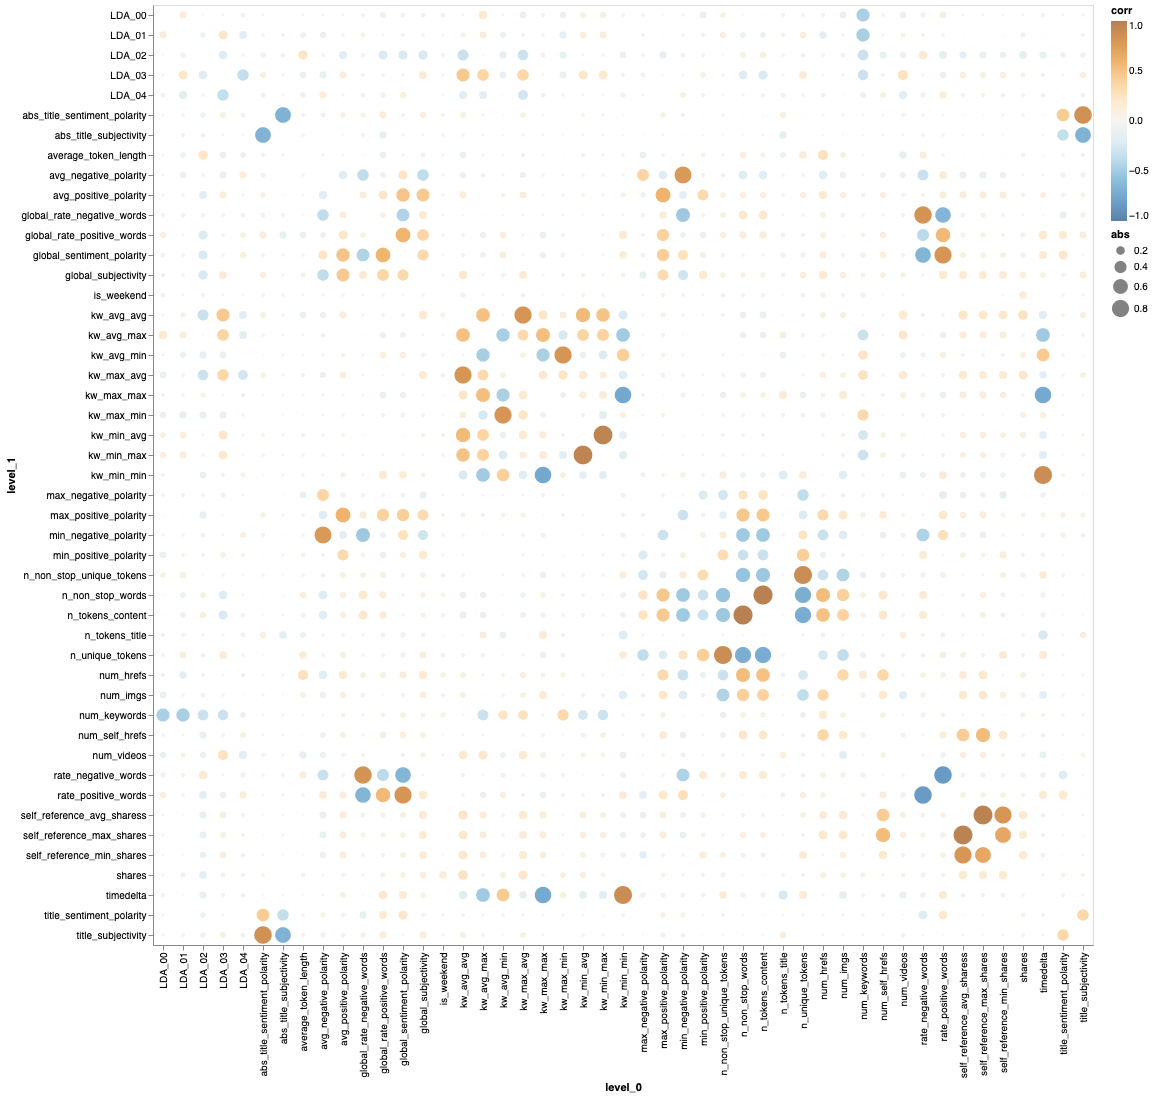

In [7]:
corr_df = ONP_csv.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
corr_df


alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))))

### Creating a correlation matrix 

In [8]:
ONP_csv.select_dtypes('number').corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,0.000272,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,-0.005996,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,0.052024,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.003186,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.002082,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,0.002001,-0.000615,-0.000644,-0.000089,-0.002032,-0.002006,0.002510,-0.003694,-0.005944,0.000989,-0.000077,0.002009,-0.003502,0.000342,-0.000965,-0.004965,-0.009781,-0.002097,0.005498,0.002043,0.005002,0.002590,0.005258,0.001709,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,-0.043263,0.012844,0.008307,-0.020150,0.051265,-0.019269,0.058920,0.069692,0.121419,-0.004804,0.080394,0.025239,0.072279,-0.020100,-0.053803,-0.012531,0.123786,-0.054977,0.203464,0.086859,0.056428,0.032515,0.101663,0.059817,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.0454

### Bar graph showing how number of shares vary based on topic

We find that Others has a large presence - and could possibly be broken down further. Needs further investigation

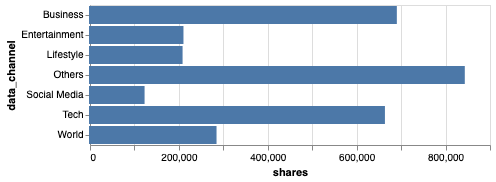

In [9]:
alt.Chart(ONP_csv).mark_bar().encode(
    y='data_channel',
    x=' shares')

### Bar graph showing how number of shares vary based on day of the week

We find that Wednesdays, Saturdays, and Mondays have larger shjares than other days of the week 

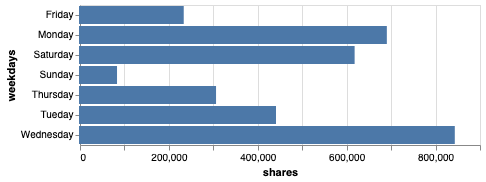

In [10]:
alt.Chart(ONP_csv).mark_bar().encode(
    y='weekdays',
    x=' shares')

### Histogram showing how number of shares vary based on day of the week

We find that Wednesdays, Saturdays, and Mondays have larger shares than other days of the week 

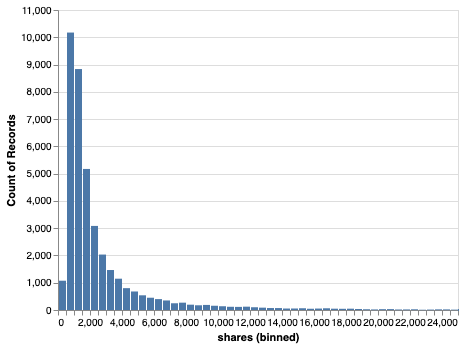

In [11]:
alt.Chart(ONP_csv).mark_bar().encode(
    x=alt.X(' shares', bin=alt.Bin(maxbins=3000),
           scale=alt.Scale(domain=(0, 25000),
            clamp=True)
),
    y='count()')


In [12]:
corr_matrix = ONP_csv.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
ONP_csv.drop(to_drop, axis=1, inplace=True)

/var/folders/xt/0m1k4lxs44z67p7c88dk55100000gp/T/ipykernel_70999/954977460.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [13]:
corr_matrix = ONP_csv.corr().abs()
corr_matrix

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_min_max,kw_avg_max,kw_min_avg,kw_max_avg,self_reference_min_shares,self_reference_max_shares,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
timedelta,1.000000,0.240320,0.062867,0.002866,0.000832,0.064530,0.027636,0.000936,0.130465,0.046884,0.591199,0.029503,0.076590,0.493093,0.157204,0.051820,0.011438,0.014501,0.000272,0.080894,0.004423,0.141713,0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.126344,0.054772,0.000507,0.063239,0.015919,0.038711,0.011551,0.008662
n_tokens_title,0.240320,1.000000,0.018160,0.005318,0.053496,0.014856,0.008858,0.051460,0.071403,0.006077,0.110672,0.005890,0.012926,0.115746,0.002370,0.006918,0.004563,0.000128,0.005996,0.070038,0.063568,0.038365,0.042208,0.065063,0.056804,0.072226,0.064951,0.015530,0.049619,0.025069,0.017096,0.011425,0.077245,0.000240,0.146954,0.008783
n_tokens_content,0.062867,0.018160,1.000000,0.004737,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,0.054345,0.000066,0.022786,0.096460,0.022286,0.030496,0.030686,0.025657,0.052024,0.026218,0.009724,0.087266,0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.135123,0.261493,0.130375,0.225870,0.004484,0.023358,0.007136,0.002459
n_unique_tokens,0.002866,0.005318,0.004737,1.000000,0.004352,0.006620,0.018802,0.000597,0.026407,0.003679,0.001601,0.000552,0.000577,0.000805,0.004563,0.002120,0.001036,0.000222,0.003186,0.002213,0.000827,0.006855,0.003689,0.004260,0.000180,0.000523,0.000014,0.000877,0.000487,0.009193,0.001453,0.007315,0.004678,0.002333,0.009242,0.000806
num_hrefs,0.000832,0.053496,0.423065,0.004352,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,0.043263,0.012844,0.020150,0.019269,0.058920,0.069692,0.004804,0.080394,0.072279,0.020100,0.053803,0.012531,0.123786,0.054977,0.203464,0.086859,0.056428,0.032515,0.188236,0.082168,0.152146,0.054948,0.043950,0.039041,0.009443,0.045404
num_self_hrefs,0.064530,0.014856,0.304682,0.006620,0.396452,1.000000,0.238586,0.077458,0.126879,0.099578,0.012896,0.001233,0.025904,0.064747,0.039239,0.013629,0.031229,0.130187,0.047798,0.021692,0.004631,0.085045,0.028775,0.135441,0.115285,0.090070,0.121140,0.011433,0.098062,0.072648,0.058222,0.039153,0.011239,0.026224,0.008961,0.001900
num_imgs,0.027636,0.008858,0.342600,0.018802,0.342633,0.238586,1.000000,0.067336,0.033924,0.088432,0.043840,0.001894,0.000528,0.002217,0.081029,0.064374,0.007142,0.035067,0.053242,0.150439,0.050080,0.094515,0.208924,0.022780,0.080468,0.021082,0.041582,0.024772,0.096446,0.024683,0.072500,0.042644,0.056815,0.046310,0.013759,0.039388
num_videos,0.000936,0.051460,0.103699,0.000597,0.114518,0.077458,0.067336,1.000000,0.002940,0.022257,0.014713,0.002860,0.043416,0.136228,0.058866,0.045002,0.003075,0.078296,0.016054,0.070489,0.011875,0.092962,0.267673,0.127429,0.082052,0.028434,0.072290,0.179167,0.097440,0.010103,0.115976,0.027251,0.061028,0.021980,0.021982,0.023936
average_token_length,0.130465,0.071403,0.167789,0.026407,0.222588,0.126879,0.033924,0.002940,1.000000,0.016814,0.033651,0.002318,0.042368,0.157419,0.076706,0.046397,0.031721,0.038471,0.003390,0.078901,0.022011,0.099121,0.181714,0.033738,0.597629,0.178537,0.322929,0.228655,0.540117,0.222207,0.324529,0.194660,0.040406,0.016718,0.026586,0.022007
num_keywords,0.046884,0.006077,0.072845,0.003679,0.125890,0.099578,0.088432,0.022257,0.016814,1.000000,0.001068,0.077500,0.278042,0.332221,0.272042,0.114036,0.005290,0.010474,0.074647,0.154895,0.062415,0.019643,0.022726,0.184254,0.038603,0.083420,0.050466,0.037969,0.033700,0.015890,0.021114,0.028036,0.016014,0.031705,0.010992,0.021818
